# 8.4 深度学习方法

传统的时间序列模型，如ARIMA，在许多问题上被熟知并发挥了重要作用。然而，这些传统方法也存在不少局限性。传统的时间序列模型只是线性函数或简单的线性变换，需要手动调整参数，例如时间依赖性，并且在数据出现损坏或缺失时效果不佳。

如果我们关注时间序列预测领域的深度学习进展，我们会发现循环神经网络（RNN）近年来备受瞩目。这些方法能够发现结构和模式，如非线性，能够轻松地处理具有多个输入变量的问题，并且对缺失数据相对稳健。RNN模型可以通过将其自身的输出作为下一步的输入来保持状态。这些深度学习模型可以称为时间序列模型，因为它们可以利用过去的数据点来进行未来预测，类似于传统的时间序列模型，如ARIMA。因此，在金融领域，这些深度学习模型具有广泛的应用前景。让我们一起来探索用于时间序列预测的深度学习模型吧。

## 1. 循环神经网络（RNNs）

循环神经网络（RNNs）被称为“循环”，因为它们对序列的每个元素执行相同的任务，输出取决于先前的计算。RNN模型具有记忆，它记录了迄今为止计算的信息。如图5-4所示，循环神经网络可以被想象为同一个网络的多个副本，每个副本将消息传递给下一个继承者。

<img src='images/RNN.png'>

<center> 循环神经网络</center>

$X_t$代表时间步$t$的输入。$O_t$代表时间步t的输出。$S_t$代表时间步t的隐藏状态，它是网络的记忆。它根据前一个隐藏状态和当前步的输入计算得出。

RNN的主要特征就是这个隐藏状态，它捕获了序列的一些信息，并在需要时相应地使用它。

## 2. 长短期记忆（LSTM）

长短期记忆网络（LSTM）架构最初由Hochreiter和Scchmidhuber（1997）提出，如今被广泛应用，原因是其在精确建模数据中短期和长期依赖关系时体现的卓越性能。

LSTM模型由一组具有序列数据特性的单元组成，这些单元能够捕获并存储数据流。此外，这些单元通过门控机制将过去的模块与当前的模块相连接，以传递信息从多个过去的时间点到当前时间点。由于每个单元都使用门控机制，因此每个单元中的数据可以被处理、过滤或添加到下一个单元中。

基于人工神经网络层的门控机制使得单元可以选择性地让数据通过或者丢弃。每一层产生的数字在零到一的范围内，描述了在每个细胞中应该通过的数据段的数量。更准确地说，估计值为零意味着“不让任何数据通过”。估计值为一则表示“让所有数据通过”。每个LSTM中涉及三种类型的门，旨在控制每个单元的状态：

**遗忘门**

输出一个介于零和一之间的数字，其中一表示“完全保留”，零表示“完全忽略”。该门有条件地决定是否应该遗忘或保留过去的信息。

**输入门**

决定哪些新数据需要存储在细胞中。

**输出门**

决定每个细胞的输出。输出的值将基于细胞状态以及经过筛选和新添加的数据。

Keras将高效的数值计算库和函数封装起来，使我们能够用几行简短的代码定义和训练LSTM神经网络模型。在下面的代码中，我们使用keras.layers中的LSTM模块来实现LSTM网络。该网络使用变量X_train_LSTM进行训练。网络有一个包含50个LSTM块或神经元的隐藏层，以及一个输出层进行单值预测。关于所有术语（例如模型序列、学习率、动量、轮次和批次样本量）的更详细描述，请参阅深度学习概念章节。

下面是一个在Keras中实现LSTM模型的Python示例代码：

```python
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import SGD 
from keras.layers import LSTM

def create_LSTMmodel(learn_rate = 0.01, momentum=0): 
    # create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1],\
                                    X_train_LSTM.shape[2])))
    
    #More number of cells can be added if needed model.add(Dense(1))
    optimizer = SGD(lr=learn_rate, momentum=momentum) 
    model.compile(loss='mse',optimizer='adam') 
    return model

LSTMModel = create_LSTMmodel(learn_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train, y_train,\
                              validation_data= (X_test, y_test),\
                              epochs=330, batch_size=72, verbose=0,\
                              shuffle=False)
```

在学习和实施方面，LSTM相较于ARIMA模型提供了更多微调的选择。尽管深度学习模型相比传统时间序列模型具有数个优势，但深度学习模型更加复杂且难以训练。

## 3. 将时间序列数据修改为监督学习模型的过程

时间序列是按时间索引排序的一系列数字。监督学习是指我们有输入变量（X）和输出变量（Y）的情况。给定一个时间序列数据集的数字序列，我们可以将数据重组成一组预测变量和预测目标变量，就像在监督学习问题中一样。我们可以通过使用先前的时间步作为输入变量，并使用下一个时间步作为输出变量来实现这一点。让我们通过一个例子来具体说明。

我们可以将图5-5左侧表中显示的时间序列重组为一个监督学习问题，方法是使用前一个时间步的值来预测下一个时间步的值。一旦我们以这种方式重新组织了时间序列数据集，数据看起来会像右边的表格所示。

<img src='images/timeseries_supervize.png'>

在我们的监督学习问题中，我们可以看到前一个时间步是输入（X），而下一个时间步是输出（Y）。观察值之间的顺序被保留，当使用该数据集训练监督模型时，必须继续保留这种顺序。在训练监督模型时，我们将删除第一行和最后一行，因为我们既没有X的值，也没有Y的值。

在Python中，帮助将时间序列数据转换为监督学习问题的主要函数是来自Pandas库的shift()函数。我们将在案例研究中演示这种方法。利用先前的时间步来预测下一个时间步的方法被称为滑动窗口、时间延迟或滞后方法。

在讨论了监督学习和时间序列模型的所有概念之后，让我们转向案例研究。

## 4. 应用LSTM模型预测股票收益率

现在让我们为LSTM模型准备数据集。我们需要将数据整理成所有输入变量和输出变量的数组形式。

LSTM的逻辑是从前一天获取数据（当天所有其他特征的数据—相关资产和微软的滞后变量），然后尝试预测下一天。然后我们将一个一天的窗口移动一天，再次预测下一天。我们会在整个数据集上以此迭代（当然是分批进行）。下面的代码将创建一个数据集，其中X是给定时间（t）的独立变量集合，而Y是下一个时间（t + 1）的目标变量：

In [1]:
seq_len = 2 #Length of the seq for the LSTM

Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test)
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1]))
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]


NameError: name 'np' is not defined

接下来，我们创建LSTM的架构。正如我们所见，LSTM的输入是X_train_LSTM，在LSTM层中有50个隐藏单元，然后转换为单个输出—股票回报值。超参数（例如学习率、优化器、激活函数等）在之前的章中已经讨论过：

In [39]:
#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM

# Lstm Network
def create_LSTMmodel(neurons=12, learning_rate = 0.01, momentum=0):
        # create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    #More number of cells can be added if needed 
    model.add(Dense(1))
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(loss='mse', optimizer='adam')
    return model
LSTMModel = create_LSTMmodel(12, learning_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM),
                              epochs=330, batch_size=72, verbose=0, shuffle=False)

现在我们使用数据来拟合LSTM模型，并同时观察训练集和测试集中模型性能指标随时间的变化：

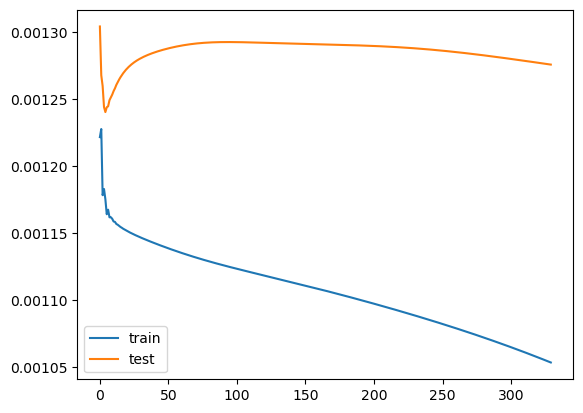

In [29]:
#Visual plot to check if the error is reducing
pyplot.plot(LSTMModel_fit.history['loss'], label='train')
pyplot.plot(LSTMModel_fit.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [30]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)

5/5 [==============================] - 0s 626us/step


为了比较时间序列和深度学习模型，我们将这些模型的结果追加到监督回归模型的结果中：